In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import koreanize_matplotlib

warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv("sample_submission.csv")

In [5]:
train.head()

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

In [53]:
train.describe()

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue
count,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,2.522890e+05
mean,3.592626,0.751955,3.816805,113.104253,0.493672,0.009033,9.061248e+05
std,5.509465,0.431879,11.091028,330.876019,0.499961,0.100938,2.127689e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00
75%,4.000000,1.000000,1.000000,71.000000,1.000000,0.000000,0.000000e+00
max,386.000000,1.000000,98.000000,11186.000000,1.000000,12.000000,3.325712e+09


In [11]:
# print(train['sessionID'].value_counts())
# print(train['userID'].value_counts())
# print(train['TARGET'].value_counts())
# print(train['browser'].value_counts())
# print(train['OS'].value_counts())
# print(train['device'].value_counts())
# print(train['new'].value_counts())
# print(train['quality'].value_counts())
# print(train['duration'].value_counts())
# print(train['bounced'].value_counts())
# print(train['transaction'].value_counts())
# print(train['transaction_revenue'].value_counts())
# print(train['continent'].value_counts())
# print(train['subcontinent'].value_counts())
# print(train['country'].value_counts())
# print(train['traffic_source'].value_counts())
# print(train['traffic_medium'].value_counts())
# print(train['keyword'].value_counts())
# print(train['referral_path'].value_counts())

sessionID
SESSION_000000    1
SESSION_168183    1
SESSION_168185    1
SESSION_168186    1
SESSION_168187    1
                 ..
SESSION_084101    1
SESSION_084102    1
SESSION_084103    1
SESSION_084104    1
SESSION_252288    1
Name: count, Length: 252289, dtype: int64
userID
USER_002675    78
USER_000643    74
USER_002967    61
USER_002775    59
USER_006147    50
               ..
USER_074258     1
USER_074259     1
USER_074260     1
USER_074261     1
USER_206023     1
Name: count, Length: 206024, dtype: int64
TARGET
1.0      126008
2.0       33690
3.0       23636
4.0       14291
5.0       10743
          ...  
125.0         1
171.0         1
270.0         1
81.0          1
199.0         1
Name: count, Length: 117, dtype: int64
browser
Chrome                                                  174395
Safari                                                   35689
Android Webview                                          13855
Firefox                                                   8436

In [13]:
train.isnull().sum()

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64

-keyword와 referral_path가 데이터의 절반 이상이 결측치로 나온다.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

-범주형 변수

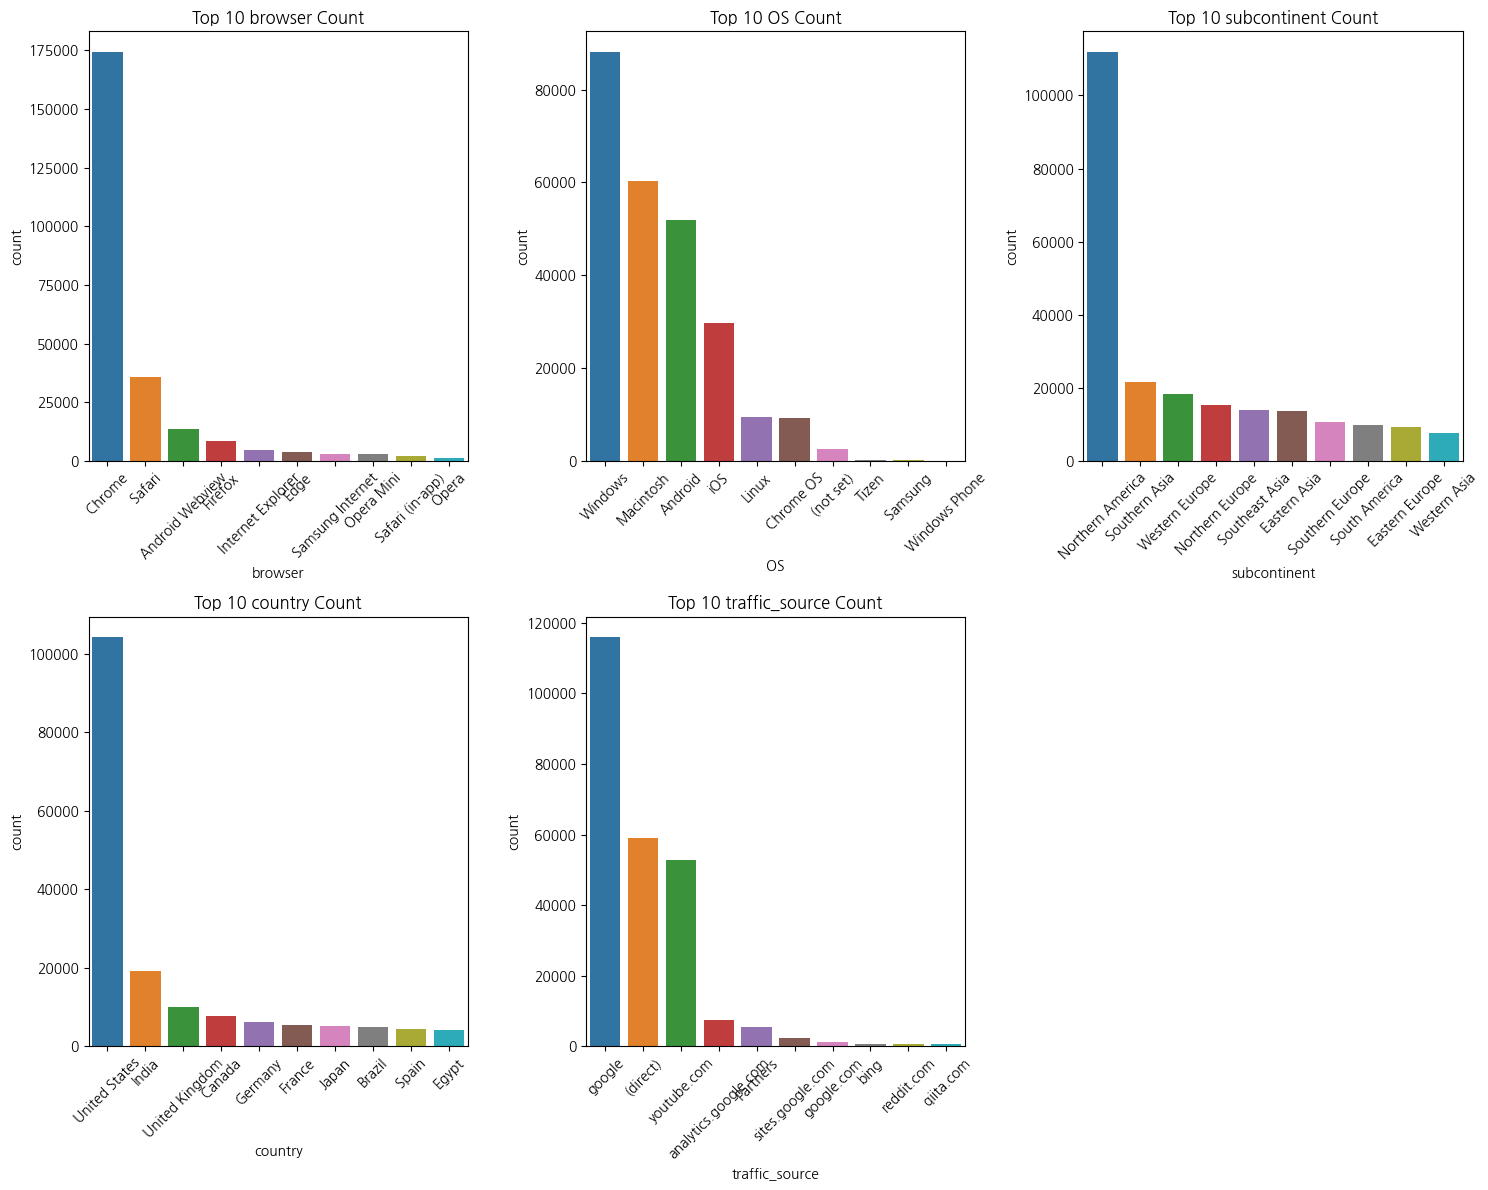

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택할 변수들
selected_variables = ['browser', 'OS', 'subcontinent', 'country', 'traffic_source']
# 상위 N개
top_n = 10

plt.figure(figsize=(15, 12))

for i, var in enumerate(selected_variables, start=1):
    # 상위 N개의 범주 선택
    top_categories = train[var].value_counts().head(top_n).index.tolist()
    
    # 상위 N개의 범주만 필터링하여 데이터 추출
    filtered_data = train[train[var].isin(top_categories)]
    
    # 각 변수에 대한 count plot 생성
    plt.subplot(2, 3, i)
    sns.countplot(data=filtered_data, x=var, order=top_categories)
    plt.title(f'Top {top_n} {var} Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


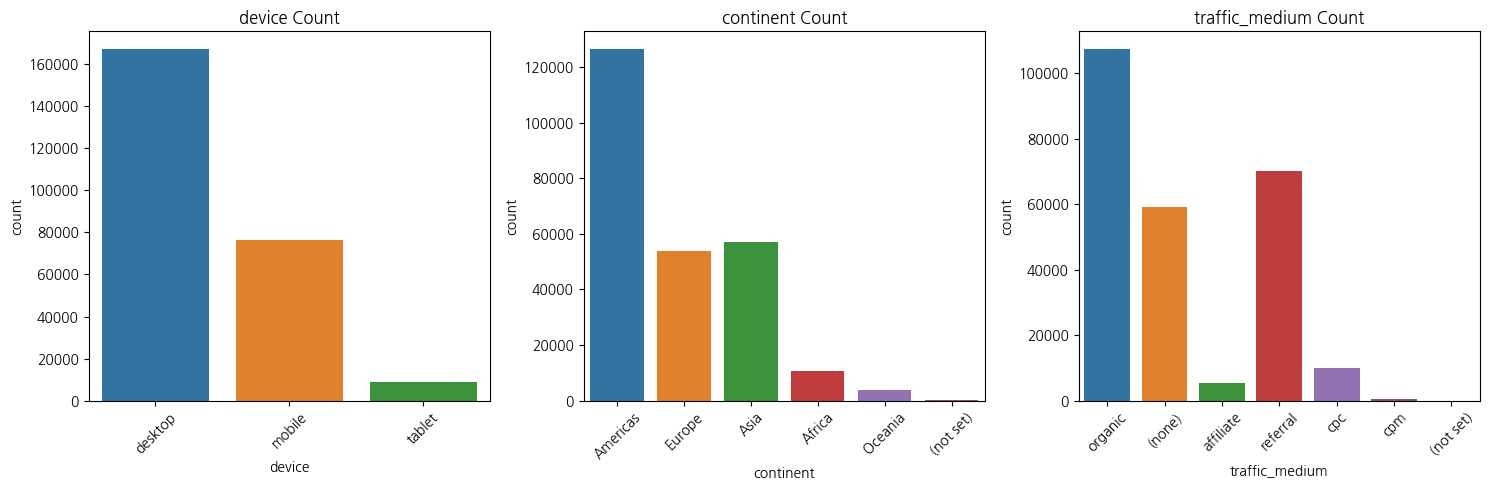

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택할 변수들
selected_variables = ['device', 'continent', 'traffic_medium']

plt.figure(figsize=(15, 5))

for i, var in enumerate(selected_variables, start=1):
    plt.subplot(1, 3, i)
    sns.countplot(data=train, x=var)
    plt.title(f'{var} Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

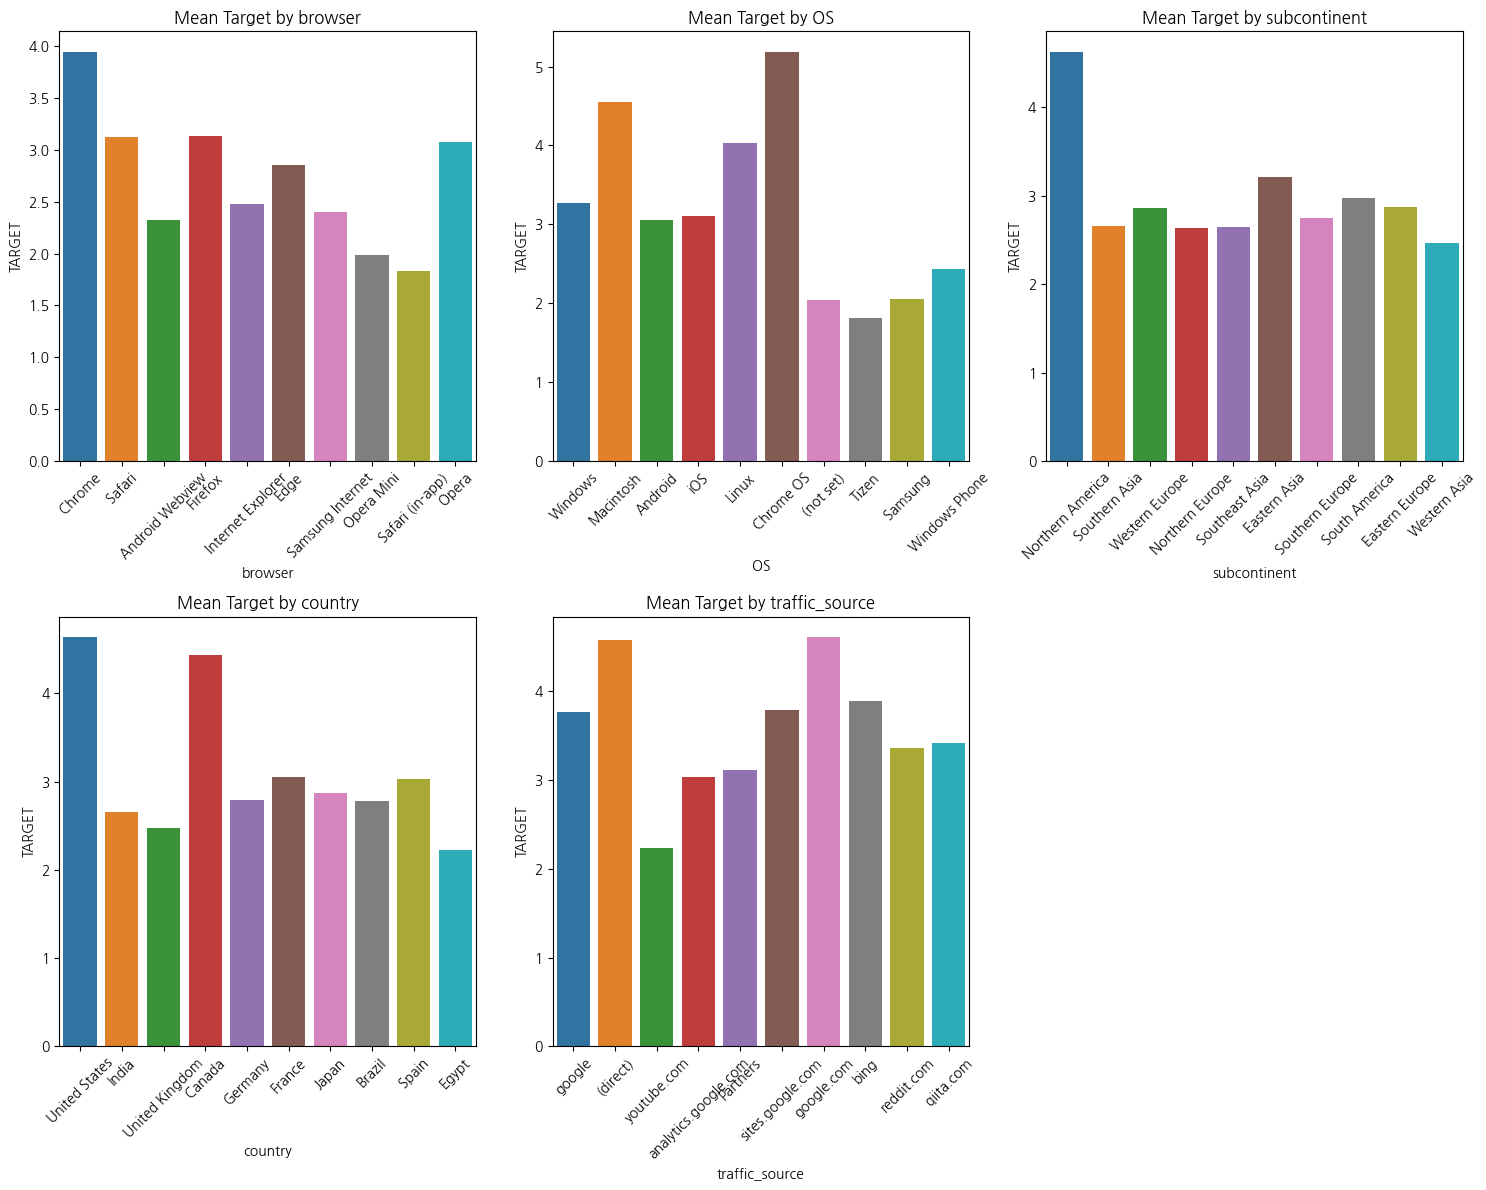

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택할 변수들
selected_variables = ['browser', 'OS', 'subcontinent', 'country', 'traffic_source']
# 상위 N개
top_n = 10

plt.figure(figsize=(15, 12))

for i, var in enumerate(selected_variables, start=1):
    # 상위 N개의 범주 선택
    top_categories = train[var].value_counts().head(top_n).index.tolist()
    
    # 상위 N개의 범주만 필터링하여 데이터 추출
    filtered_data = train[train[var].isin(top_categories)]
    
    # 각 범주별 조회수(Target)의 평균 계산
    mean_target = filtered_data.groupby(var)['TARGET'].mean().reset_index()
    
    # 시각화
    plt.subplot(2, 3, i)
    sns.barplot(data=mean_target, x=var, y='TARGET', order=top_categories)
    plt.title(f'Mean Target by {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


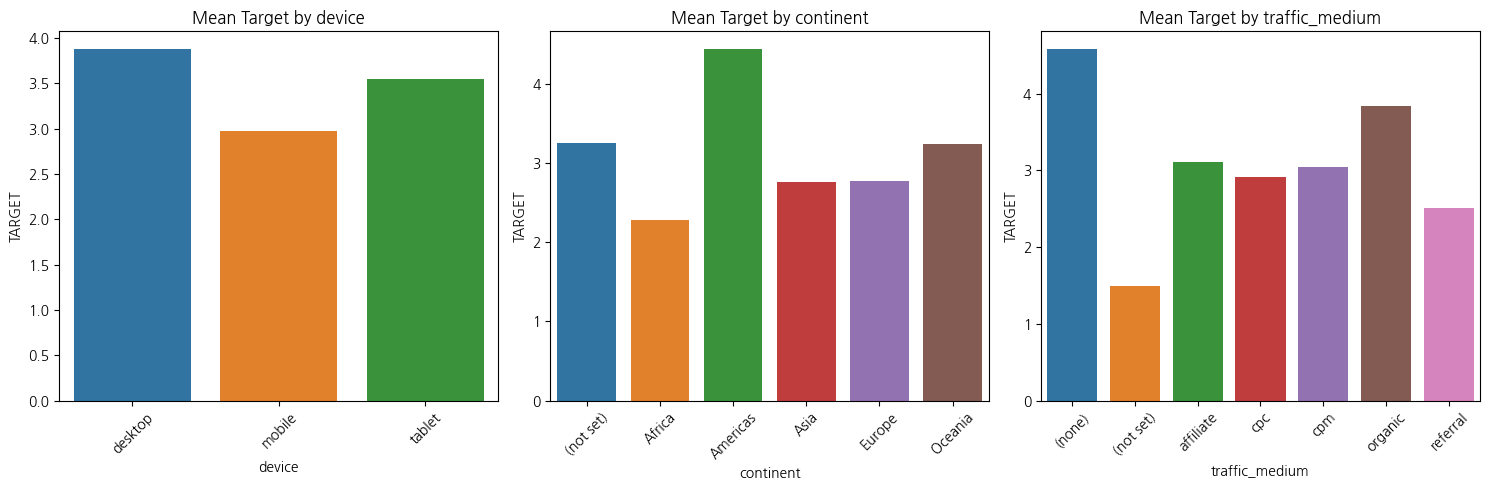

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택할 변수들
selected_variables = ['device', 'continent', 'traffic_medium']

plt.figure(figsize=(15, 5))

for i, var in enumerate(selected_variables, start=1):
    # 각 변수별로 조회수(Target)의 평균 계산
    mean_target = train.groupby(var)['TARGET'].mean().reset_index()
    
    # 시각화
    plt.subplot(1, 3, i)
    sns.barplot(data=mean_target, x=var, y='TARGET')
    plt.title(f'Mean Target by {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


-수치형 변수-

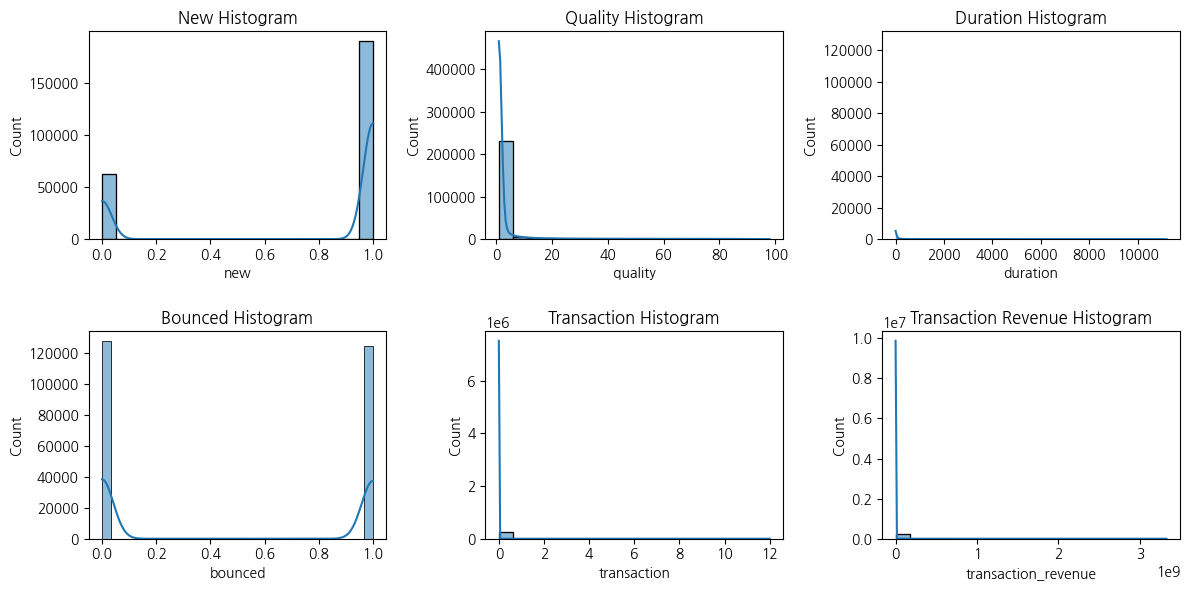

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.histplot(train['new'], kde=True)
plt.title('New Histogram')

plt.subplot(2, 3, 2)
sns.histplot(train['quality'], kde=True)
plt.title('Quality Histogram')

plt.subplot(2, 3, 3)
sns.histplot(train['duration'], kde=True)
plt.title('Duration Histogram')

plt.subplot(2, 3, 4)
sns.histplot(train['bounced'], kde=True)
plt.title('Bounced Histogram')

plt.subplot(2, 3, 5)
sns.histplot(train['transaction'], kde=True)
plt.title('Transaction Histogram')

plt.subplot(2, 3, 6)
sns.histplot(train['transaction_revenue'], kde=True)
plt.title('Transaction Revenue Histogram')

plt.tight_layout()
plt.show()


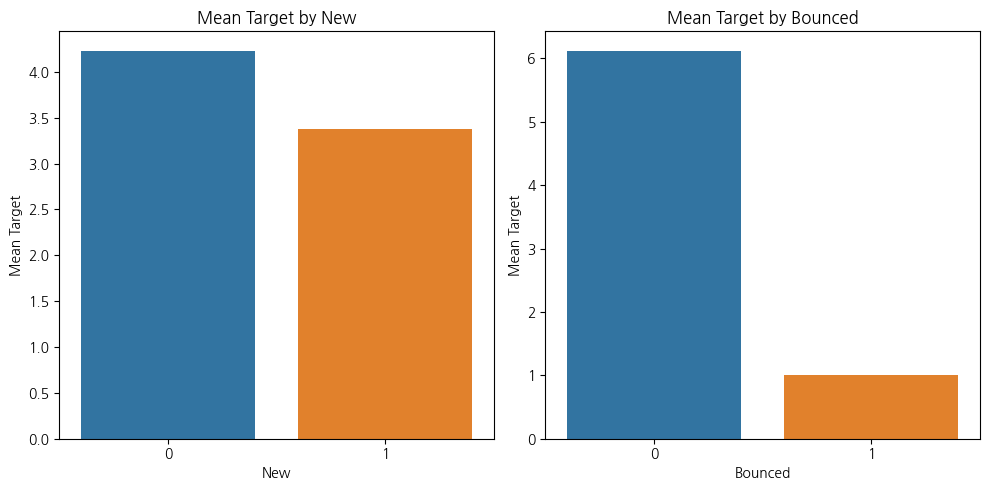

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# new 변수의 0과 1 범주별 조회수(Target)의 평균값 계산
mean_target_new = train.groupby('new')['TARGET'].mean().reset_index()

# bounced 변수의 0과 1 범주별 조회수(Target)의 평균값 계산
mean_target_bounced = train.groupby('bounced')['TARGET'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=mean_target_new, x='new', y='TARGET')
plt.title('Mean Target by New')
plt.xlabel('New')
plt.ylabel('Mean Target')

plt.subplot(1, 2, 2)
sns.barplot(data=mean_target_bounced, x='bounced', y='TARGET')
plt.title('Mean Target by Bounced')
plt.xlabel('Bounced')
plt.ylabel('Mean Target')

plt.tight_layout()
plt.show()


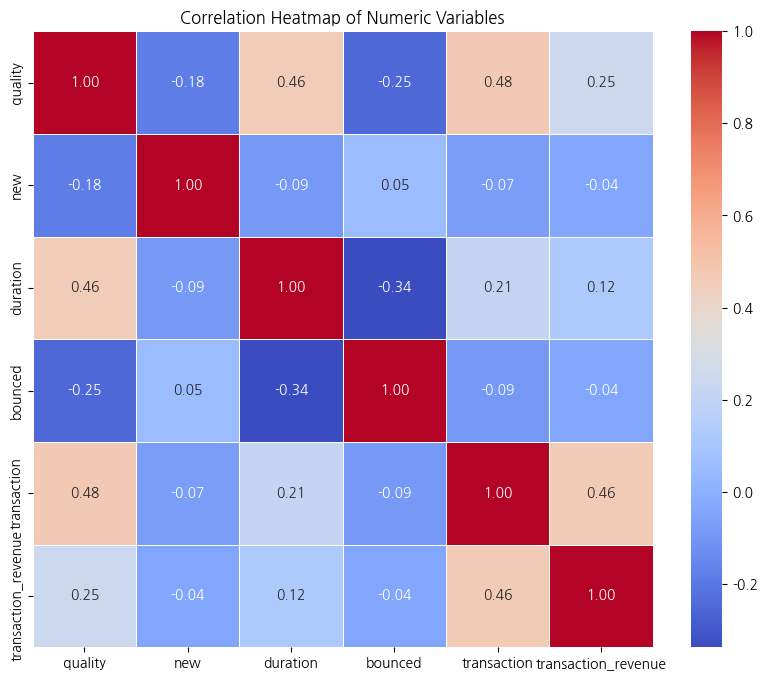

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수들의 상관 관계 계산
numeric_vars = ['quality', 'new', 'duration', 'bounced', 'transaction', 'transaction_revenue']
correlation_matrix = train[numeric_vars].corr()

# 상관 관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


-transaction과 transaction_revenue가 0.46, transaction과 quality가 0.48로 그나마 높은 상관관계를 보이는 것을 확인 할 수 있다.

-범주형 변수와 수치형 변수들의 조합

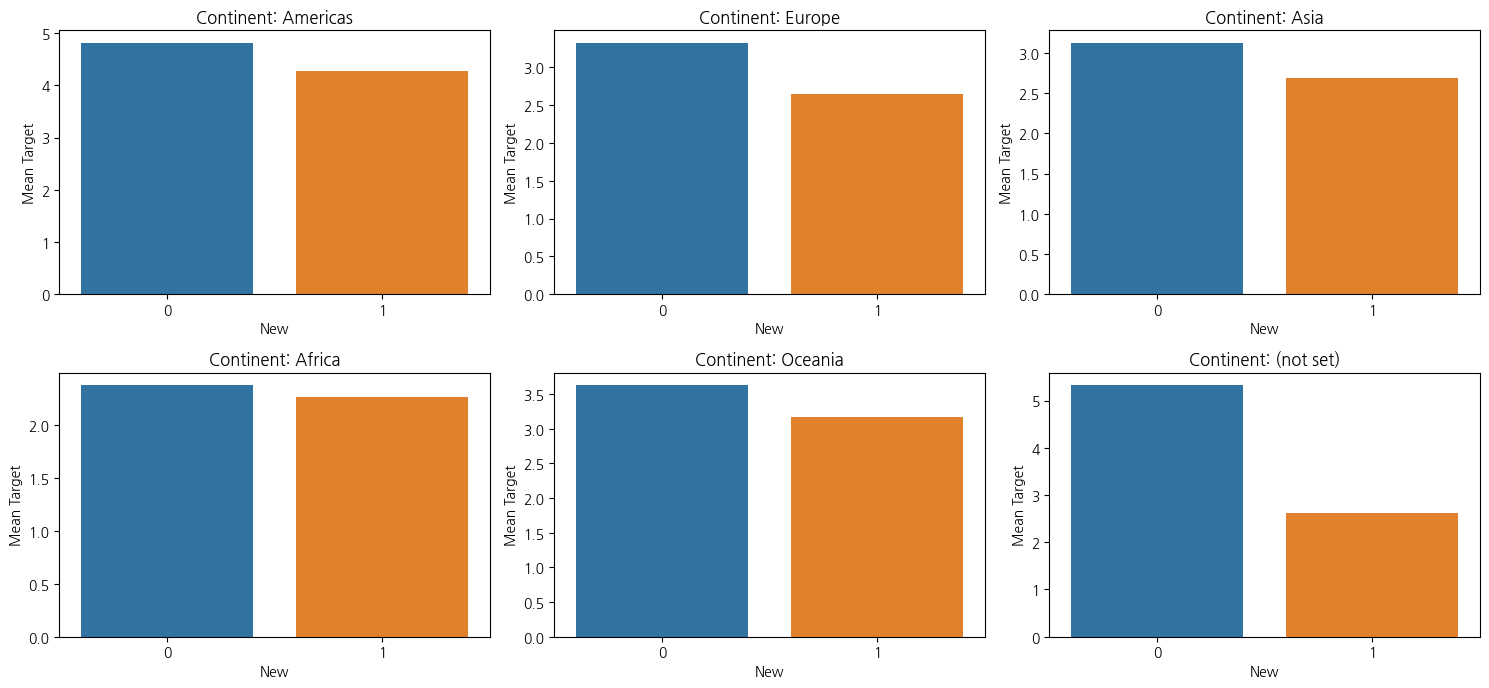

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# continent 변수의 unique 값 확인
continents = train['continent'].unique()

# continent별 subplot 그리기
plt.figure(figsize=(15, 10))
for i, continent in enumerate(continents, start=1):
    plt.subplot(3, 3, i)
    sns.barplot(data=train[train['continent'] == continent], x='new', y='TARGET', ci=None)
    plt.title(f'Continent: {continent}')
    plt.xlabel('New')
    plt.ylabel('Mean Target')

plt.tight_layout()
plt.show()


-모든 continent에서 new가 0인 부분이 target의 평균치가 더 높은 것을 확인 할 수 있다.(아무래도 0은 접속한 경험이 있는 사람들을 의미하므로 그래서 target이 더 높은 것으로 추정?)

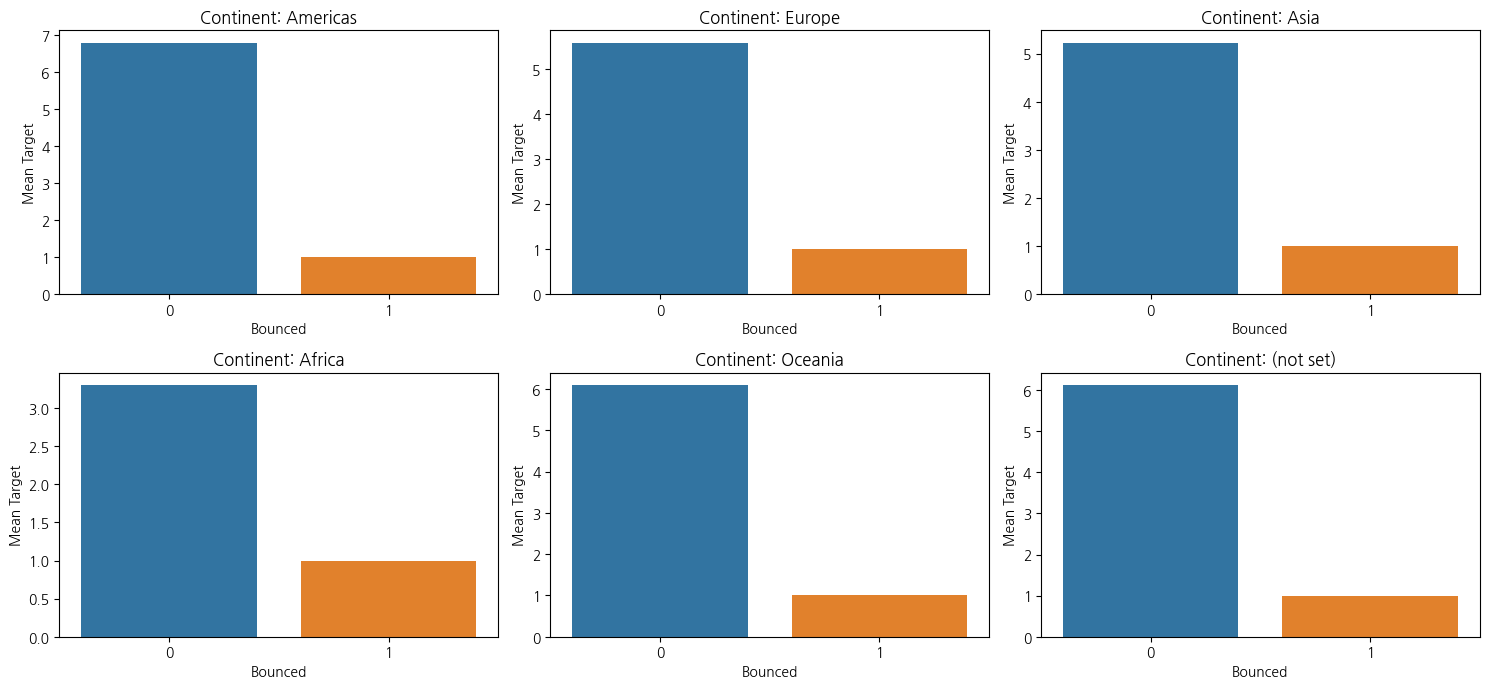

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# continent 변수의 unique 값 확인
continents = train['continent'].unique()

# continent별 subplot 그리기
plt.figure(figsize=(15, 10))
for i, continent in enumerate(continents, start=1):
    plt.subplot(3, 3, i)
    sns.barplot(data=train[train['continent'] == continent], x='bounced', y='TARGET', ci=None)
    plt.title(f'Continent: {continent}')
    plt.xlabel('Bounced')
    plt.ylabel('Mean Target')

plt.tight_layout()
plt.show()


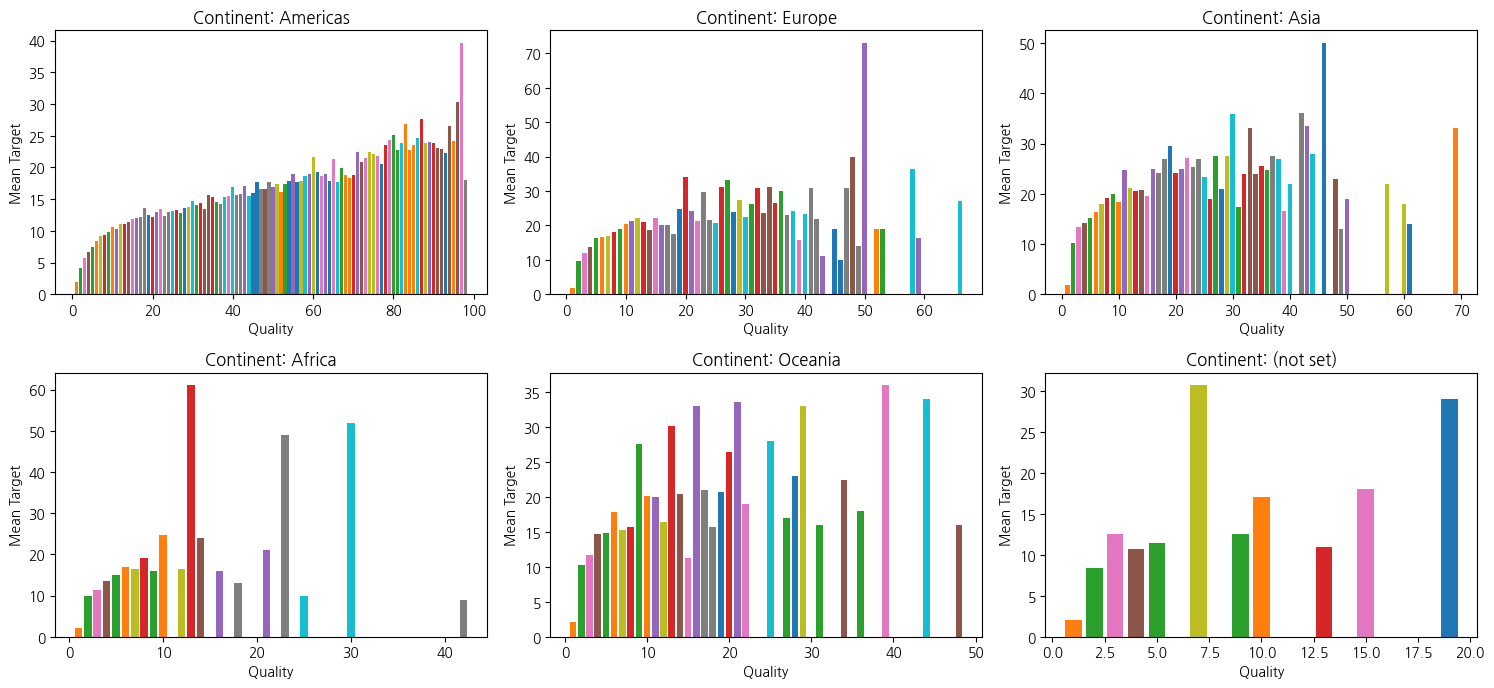

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# continent 변수의 unique 값 확인
continents = train['continent'].unique()

# quality 변수의 unique 값 확인
qualities = train['quality'].unique()

# continent별 subplot 그리기
plt.figure(figsize=(15, 10))
for i, continent in enumerate(continents, start=1):
    plt.subplot(3, 3, i)
    for quality in qualities:
        mean_target = train[(train['continent'] == continent) & (train['quality'] == quality)]['TARGET'].mean()
        plt.bar(quality, mean_target, label=f'Quality {quality}')
    plt.title(f'Continent: {continent}')
    plt.xlabel('Quality')
    plt.ylabel('Mean Target')
   

plt.tight_layout()
plt.show()


-america의 경우 quality의 수가 높아질수록 tatget이 높아지는 경향을 확인 할 수 있다.

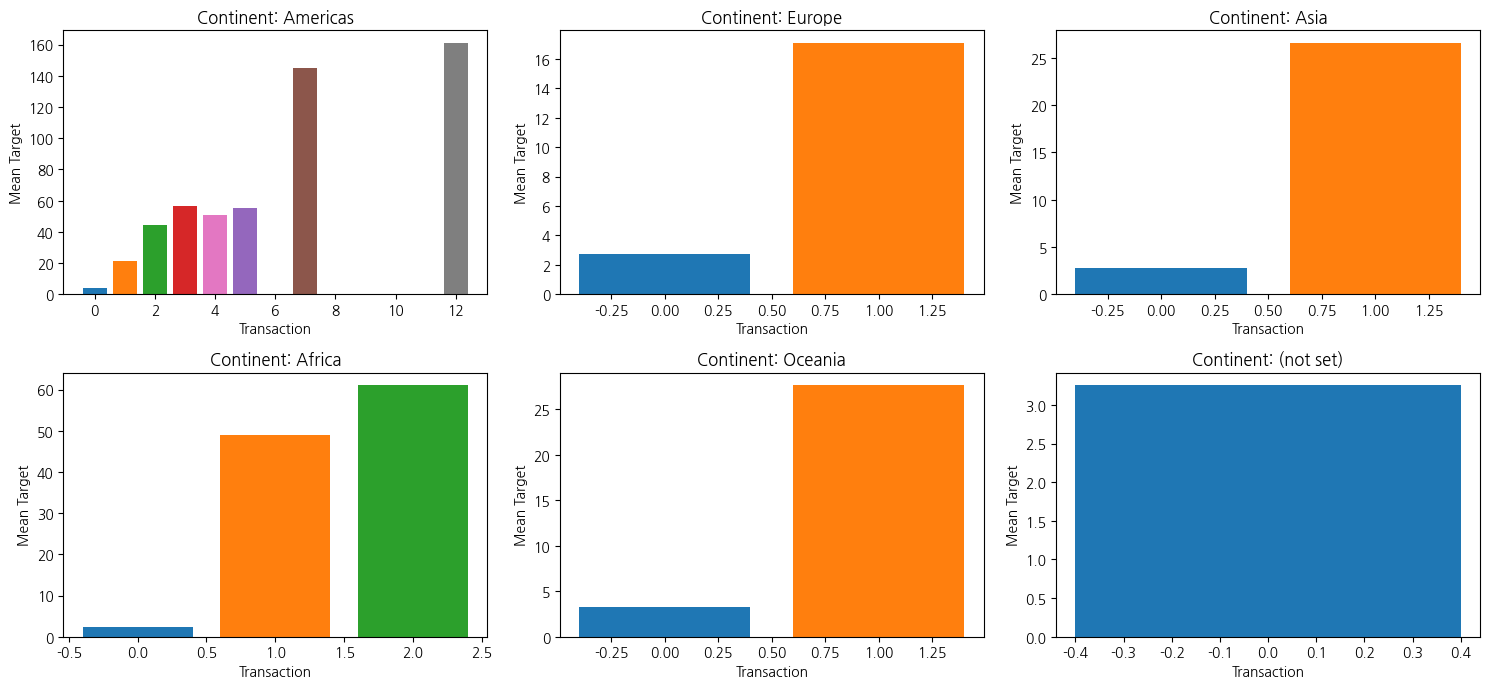

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# continent 변수의 unique 값 확인
continents = train['continent'].unique()

# transaction 변수의 unique 값 확인
transactions = train['transaction'].unique()

# continent별 subplot 그리기
plt.figure(figsize=(15, 10))
for i, continent in enumerate(continents, start=1):
    plt.subplot(3, 3, i)
    for transaction in transactions:
        mean_target = train[(train['continent'] == continent) & (train['transaction'] == transaction)]['TARGET'].mean()
        plt.bar(transaction, mean_target, label=f'Transaction {transaction}')
    plt.title(f'Continent: {continent}')
    plt.xlabel('Transaction')
    plt.ylabel('Mean Target')
   

plt.tight_layout()
plt.show()


-대체로 모든 continent에서 transaction이 높을수록 target의 평균치가 더 높은 경향을 확인 할 수 있다.

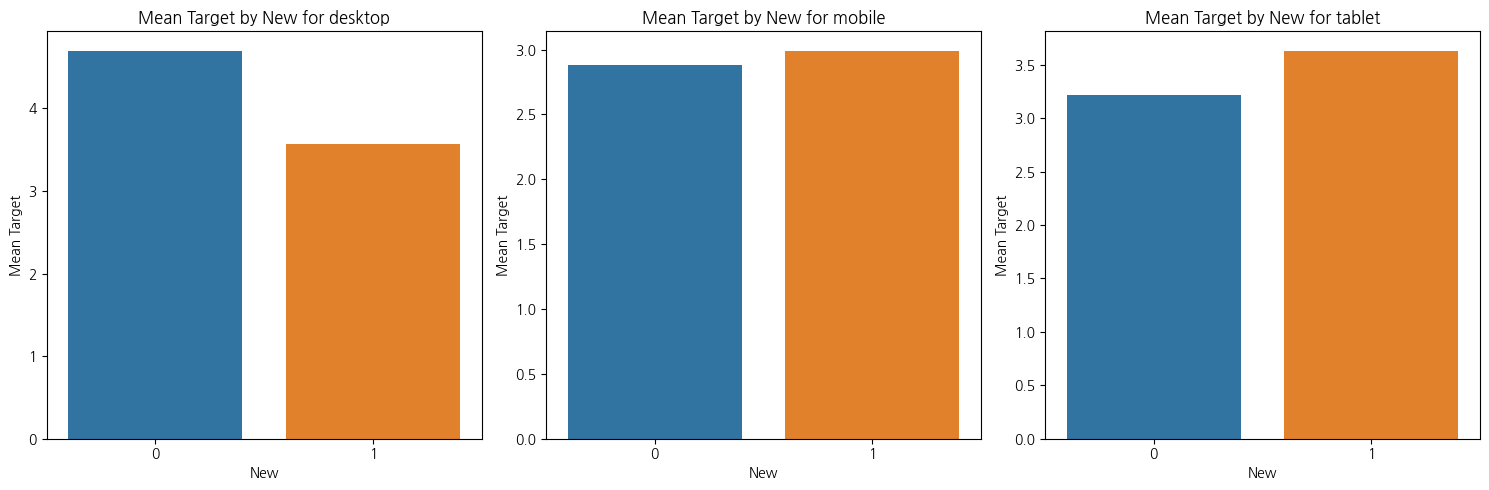

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# device 변수의 unique 값 확인
devices = train['device'].unique()

# device별 subplot 그리기
plt.figure(figsize=(15, 5))
for i, device in enumerate(devices, start=1):
    plt.subplot(1, len(devices), i)
    
    # device 변수의 각 범주별 조회수(Target)의 평균값 계산
    mean_target_device = train[train['device'] == device].groupby('new')['TARGET'].mean().reset_index()
    
    # 그래프 그리기
    sns.barplot(data=mean_target_device, x='new', y='TARGET')
    plt.title(f'Mean Target by New for {device}')
    plt.xlabel('New')
    plt.ylabel('Mean Target')

plt.tight_layout()
plt.show()


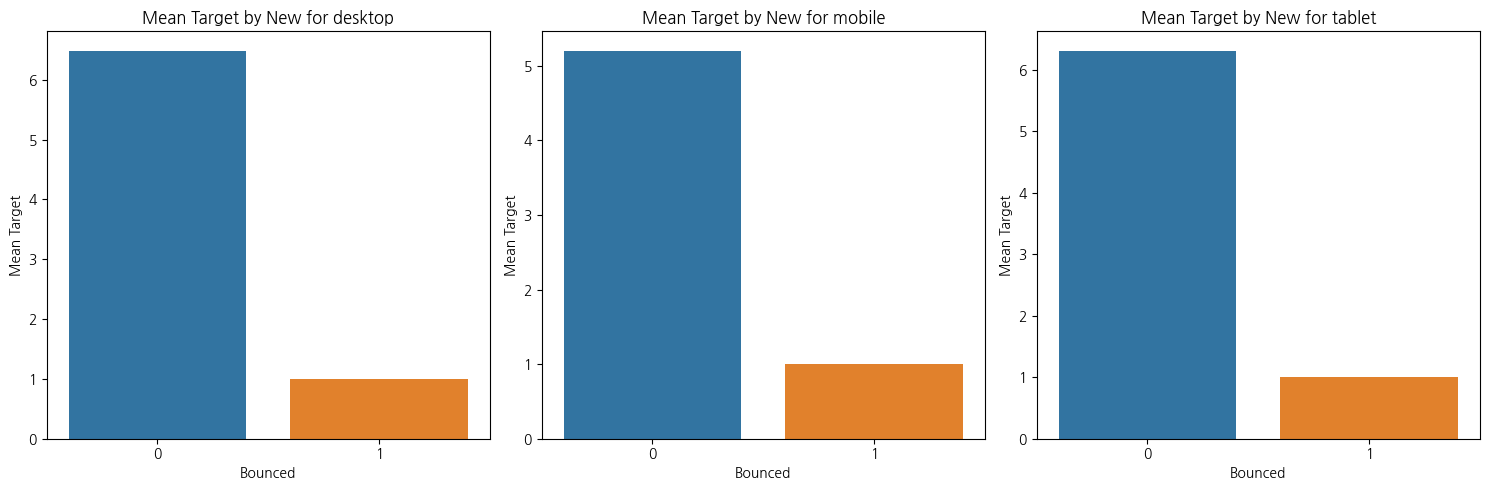

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# device 변수의 unique 값 확인
devices = train['device'].unique()

# device별 subplot 그리기
plt.figure(figsize=(15, 5))
for i, device in enumerate(devices, start=1):
    plt.subplot(1, len(devices), i)
    
    # device 변수의 각 범주별 조회수(Target)의 평균값 계산
    mean_target_device = train[train['device'] == device].groupby('bounced')['TARGET'].mean().reset_index()
    
    # 그래프 그리기
    sns.barplot(data=mean_target_device, x='bounced', y='TARGET')
    plt.title(f'Mean Target by New for {device}')
    plt.xlabel('Bounced')
    plt.ylabel('Mean Target')

plt.tight_layout()
plt.show()


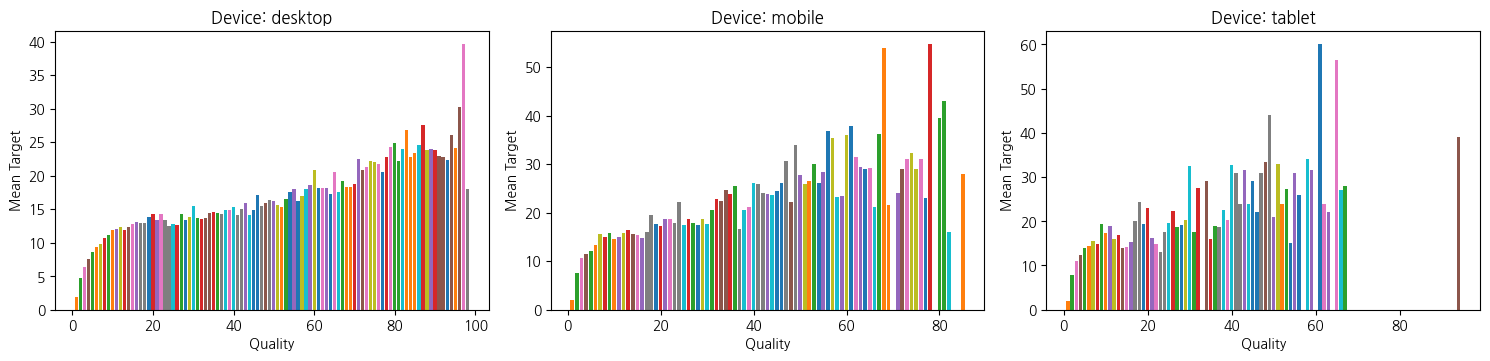

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# device 변수의 unique 값 확인
devices = train['device'].unique()

# quality 변수의 unique 값 확인
qualities = train['quality'].unique()

# device별 subplot 그리기
plt.figure(figsize=(15, 10))
for i, device in enumerate(devices, start=1):
    plt.subplot(3, 3, i)
    for quality in qualities:
        mean_target = train[(train['device'] == device) & (train['quality'] == quality)]['TARGET'].mean()
        plt.bar(quality, mean_target, label=f'Quality {quality}')
    plt.title(f'Device: {device}')
    plt.xlabel('Quality')
    plt.ylabel('Mean Target')
    

plt.tight_layout()
plt.show()


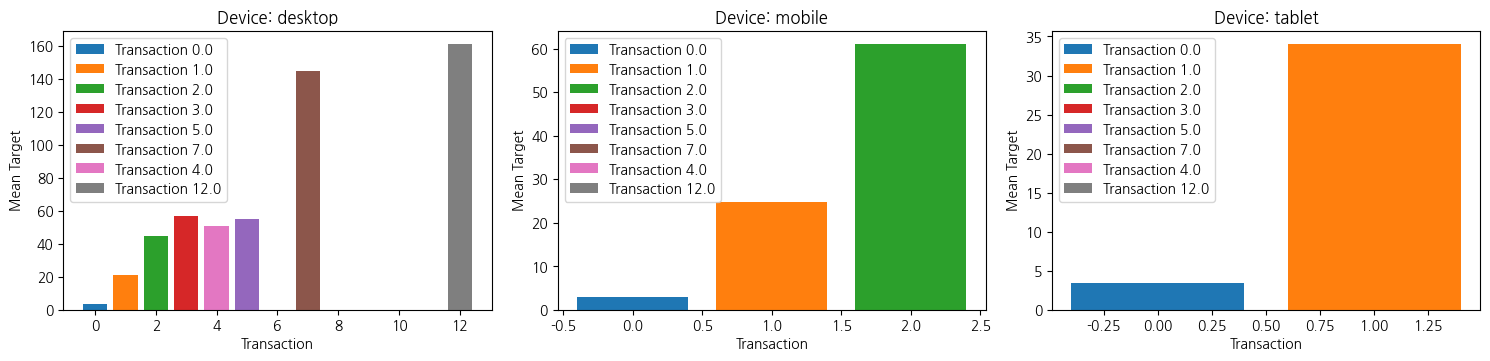

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# device 변수의 unique 값 확인
devices = train['device'].unique()

# transaction 변수의 unique 값 확인
transactions = train['transaction'].unique()

# device별 subplot 그리기
plt.figure(figsize=(15, 10))
for i, device in enumerate(devices, start=1):
    plt.subplot(3, 3, i)
    for transaction in transactions:
        mean_target = train[(train['device'] == device) & (train['transaction'] == transaction)]['TARGET'].mean()
        plt.bar(transaction, mean_target, label=f'Transaction {transaction}')
    plt.title(f'Device: {device}')
    plt.xlabel('Transaction')
    plt.ylabel('Mean Target')
    plt.legend()

plt.tight_layout()
plt.show()


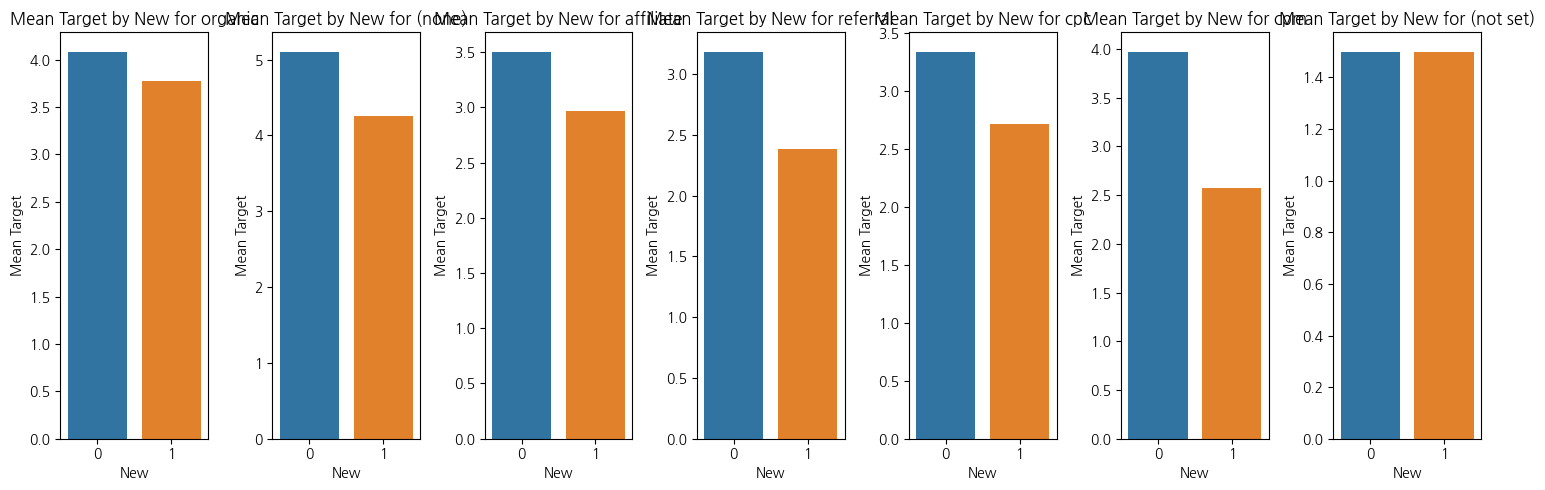

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# traffic_medium 변수의 unique 값 확인
traffic_mediums = train['traffic_medium'].unique()

# traffic_medium별 subplot 그리기
plt.figure(figsize=(15, 5))
for i, traffic_medium in enumerate(traffic_mediums, start=1):
    plt.subplot(1, len(traffic_mediums), i)
    
    # traffic_medium 변수의 각 범주별 조회수(Target)의 평균값 계산
    mean_target_traffic_medium = train[train['traffic_medium'] == traffic_medium].groupby('new')['TARGET'].mean().reset_index()
    
    # 그래프 그리기
    sns.barplot(data=mean_target_traffic_medium, x='new', y='TARGET')
    plt.title(f'Mean Target by New for {traffic_medium}')
    plt.xlabel('New')
    plt.ylabel('Mean Target')

plt.tight_layout()
plt.show()


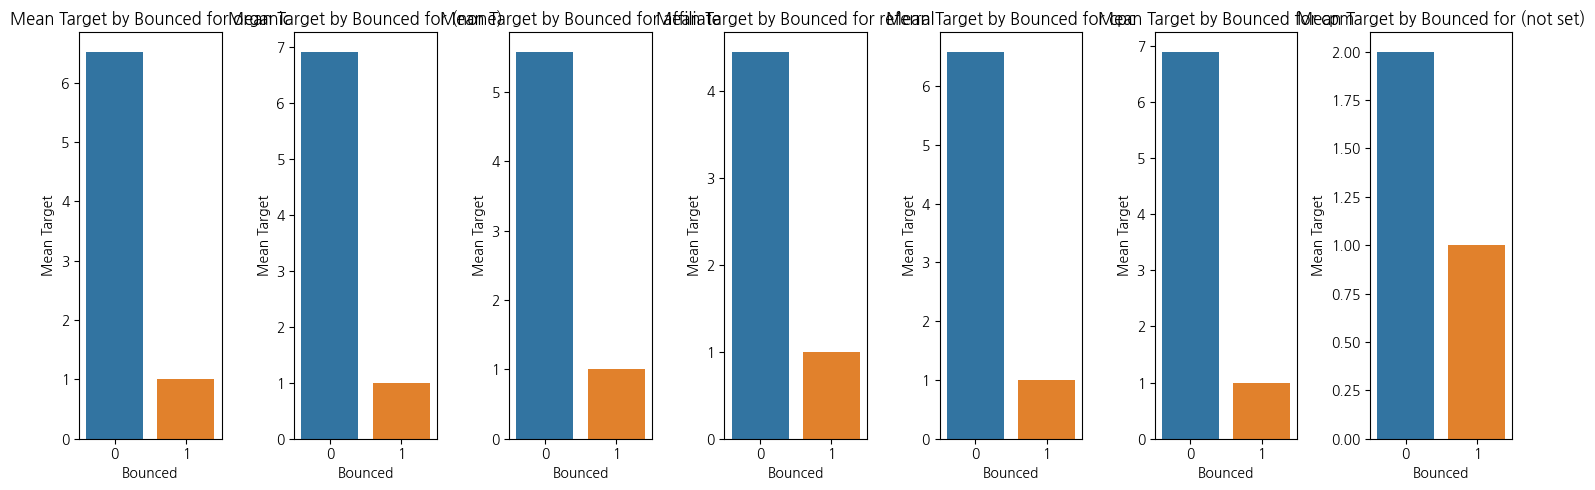

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# traffic_medium 변수의 unique 값 확인
traffic_mediums = train['traffic_medium'].unique()

# traffic_medium별 subplot 그리기
plt.figure(figsize=(15, 5))
for i, traffic_medium in enumerate(traffic_mediums, start=1):
    plt.subplot(1, len(traffic_mediums), i)
    
    # traffic_medium 변수의 각 범주별 조회수(Target)의 평균값 계산
    mean_target_traffic_medium = train[train['traffic_medium'] == traffic_medium].groupby('bounced')['TARGET'].mean().reset_index()
    
    # 그래프 그리기
    sns.barplot(data=mean_target_traffic_medium, x='bounced', y='TARGET')
    plt.title(f'Mean Target by Bounced for {traffic_medium}')
    plt.xlabel('Bounced')
    plt.ylabel('Mean Target')

plt.tight_layout()
plt.show()


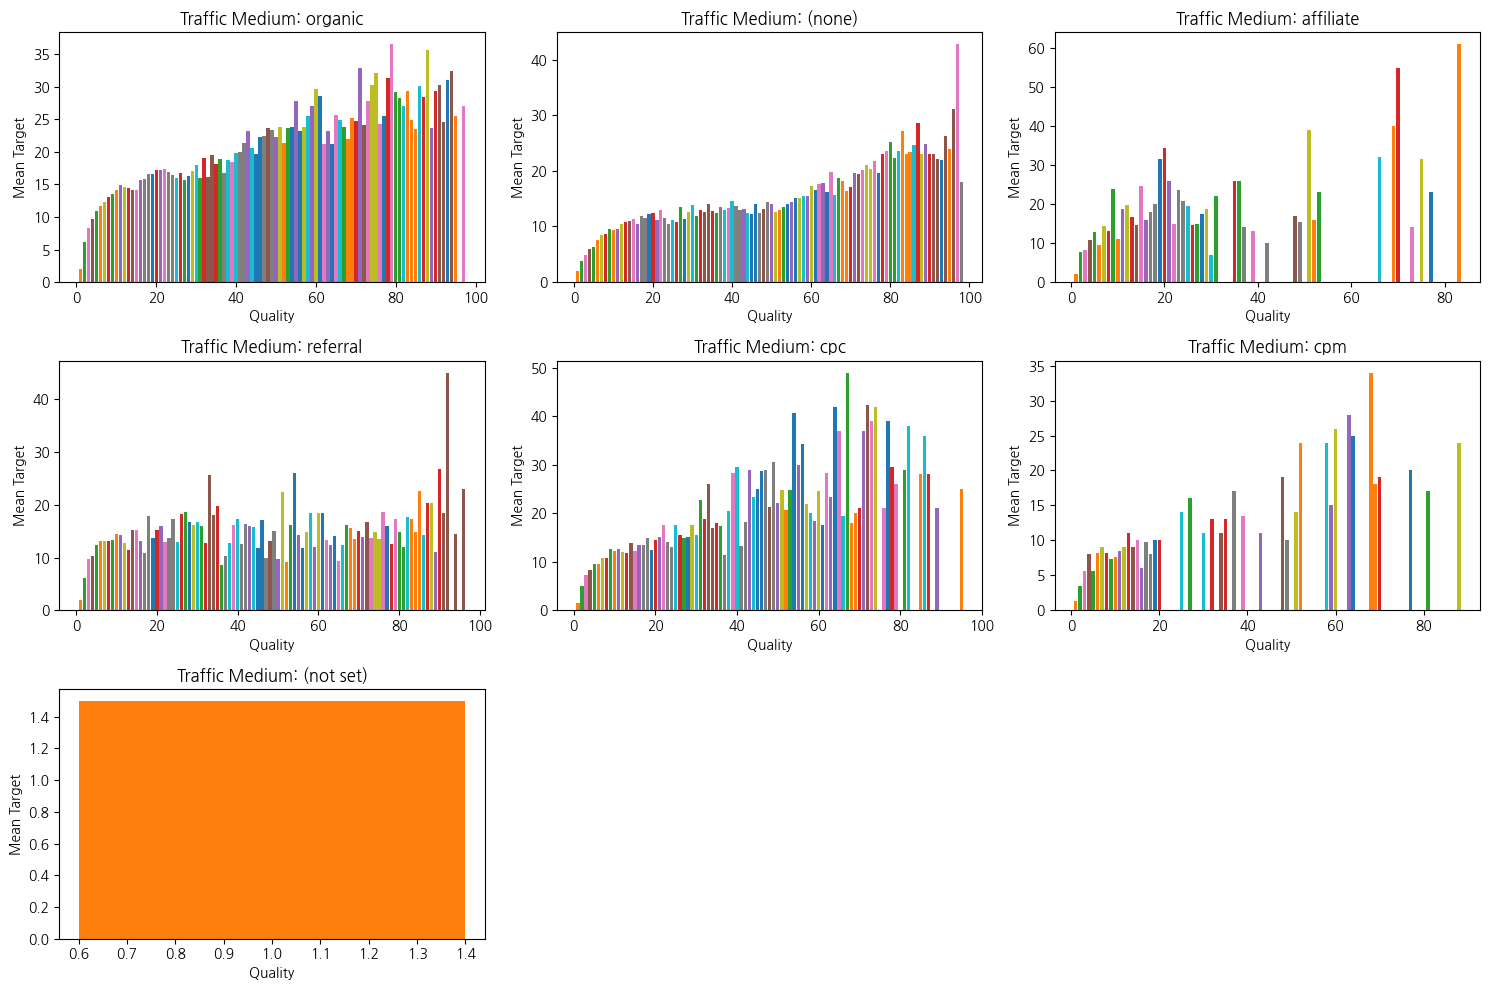

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# traffic_medium 변수의 unique 값 확인
traffic_mediums = train['traffic_medium'].unique()

# quality 변수의 unique 값 확인
qualities = train['quality'].unique()

# traffic_medium별 subplot 그리기
plt.figure(figsize=(15, 10))
for i, traffic_medium in enumerate(traffic_mediums, start=1):
    plt.subplot(3, 3, i)
    for quality in qualities:
        mean_target = train[(train['traffic_medium'] == traffic_medium) & (train['quality'] == quality)]['TARGET'].mean()
        plt.bar(quality, mean_target, label=f'Quality {quality}')
    plt.title(f'Traffic Medium: {traffic_medium}')
    plt.xlabel('Quality')
    plt.ylabel('Mean Target')
    

plt.tight_layout()
plt.show()


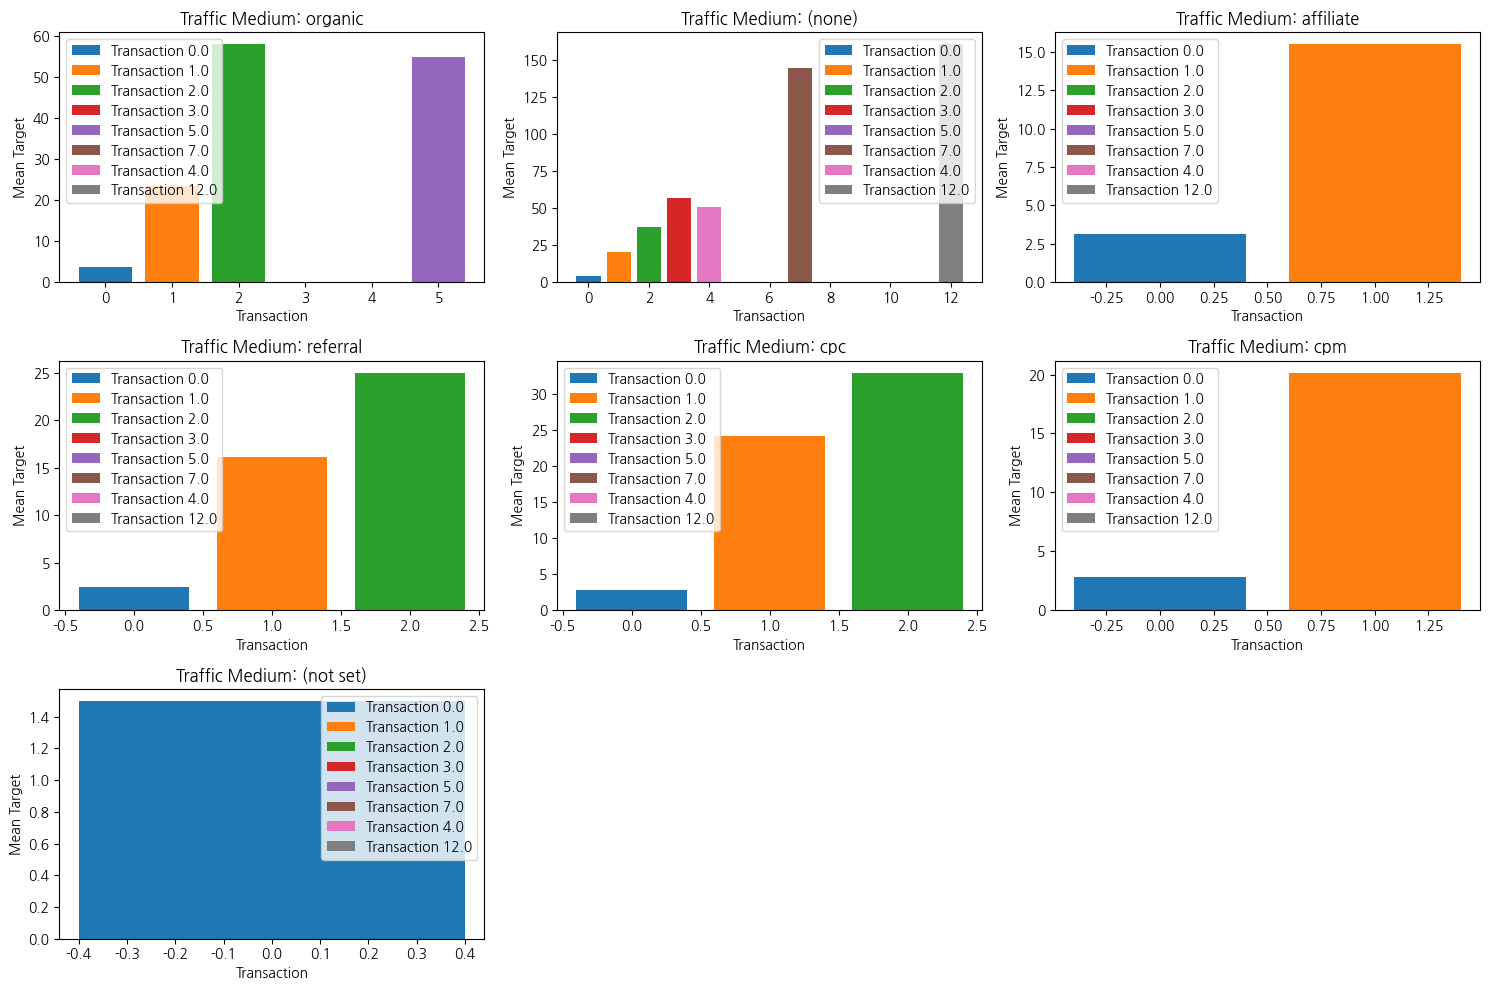

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# traffic_medium 변수의 unique 값 확인
traffic_mediums = train['traffic_medium'].unique()

# transaction 변수의 unique 값 확인
transactions = train['transaction'].unique()

# traffic_medium별 subplot 그리기
plt.figure(figsize=(15, 10))
for i, traffic_medium in enumerate(traffic_mediums, start=1):
    plt.subplot(3, 3, i)
    for transaction in transactions:
        mean_target = train[(train['traffic_medium'] == traffic_medium) & (train['transaction'] == transaction)]['TARGET'].mean()
        plt.bar(transaction, mean_target, label=f'Transaction {transaction}')
    plt.title(f'Traffic Medium: {traffic_medium}')
    plt.xlabel('Transaction')
    plt.ylabel('Mean Target')
    plt.legend()

plt.tight_layout()
plt.show()
